# covid_toy

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()

In [2]:
cd=pd.read_csv('covid_toy.csv')
cd.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


# checking of the information

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


# checking of the null value 

In [9]:
cd.isnull()

,age,gender,fever,cough,city,has_covid
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
95,False,False,False,False,False,False
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,False,False,False,False,False


In [10]:
cd.isnull().any()

age          False
gender       False
fever         True
cough        False
city         False
has_covid    False
dtype: bool

In [11]:
cd['age'].mean()

44.22

In [8]:
cd['fever'].mean()


100.84444444444445

In [10]:
# filling the null value by the mean
cd['fever']=cd['fever'].fillna(cd['fever'].mean())


In [12]:
cd.isnull().any()

age          False
gender       False
fever        False
cough        False
city         False
has_covid    False
dtype: bool

# checking the states value

In [15]:
cd.isnull()

,age,gender,fever,cough,city,has_covid
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
95,False,False,False,False,False,False
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,False,False,False,False,False


In [17]:
cd.describe()

,age,fever
count,100.000000,100.000000
mean,44.220000,100.844444
std,24.878931,1.948380
min,5.000000,98.000000
25%,20.000000,99.000000
50%,45.000000,100.922222
75%,66.500000,102.000000
max,84.000000,104.000000


In [19]:
### checking of the value of the has covid

In [21]:
cd['has_covid'].value_counts()

has_covid
No     55
Yes    45
Name: count, dtype: int64

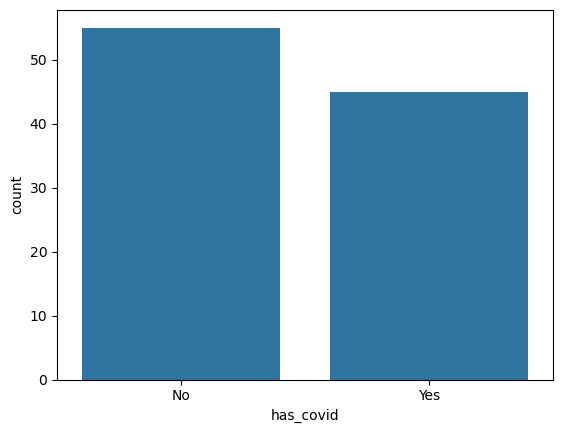

In [23]:
sns.countplot(x=cd['has_covid'])
plt.show()

In [24]:
cd.columns

Index(['age', 'gender', 'fever', 'cough', 'city', 'has_covid'], dtype='object')

In [27]:
X=cd[['age', 'gender', 'fever', 'cough', 'city']]

In [29]:
Y=cd['has_covid']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [33]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((80, 5), (20, 5), (80,), (20,))

In [37]:
## now calculate  the accuracy of the spliting data

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [41]:
gender_encoder=LabelEncoder()
fever_encoder=LabelEncoder()
cough_encoder=LabelEncoder()
city_encoder=LabelEncoder()


In [43]:
import warnings
warnings.filterwarnings('ignore')
gender_encoder.fit(pd.DataFrame(X['gender']))
X['gender']=gender_encoder.transform(X['gender'])

fever_encoder.fit(pd.DataFrame(X['fever']))
X['fever']=fever_encoder.transform(X['fever'])

cough_encoder.fit(pd.DataFrame(X['cough']))
X['cough']=cough_encoder.transform(X['cough'])

city_encoder.fit(pd.DataFrame(X['city']))
X['city']=city_encoder.transform(X['city'])


In [45]:
X.head()

,age,gender,fever,cough,city
0,60,1,6,0,2
1,27,1,2,0,1
2,42,1,4,0,1
3,31,0,0,0,2
4,65,0,4,0,3


In [47]:
X['city'].value_counts()

city
2    32
0    30
1    22
3    16
Name: count, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [53]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((80, 5), (20, 5), (80,), (20,))

In [55]:
from sklearn.linear_model import LinearRegression

In [57]:
from sklearn.svm import SVC

In [59]:
X.corr()

,age,gender,fever,cough,city
age,1.000000,0.018053,-0.006845,-0.008622,-0.010377
gender,0.018053,1.000000,0.010701,-0.191849,-0.093890
fever,-0.006845,0.010701,1.000000,-0.137119,-0.076340
cough,-0.008622,-0.191849,-0.137119,1.000000,-0.017718
city,-0.010377,-0.093890,-0.076340,-0.017718,1.000000


<Axes: >

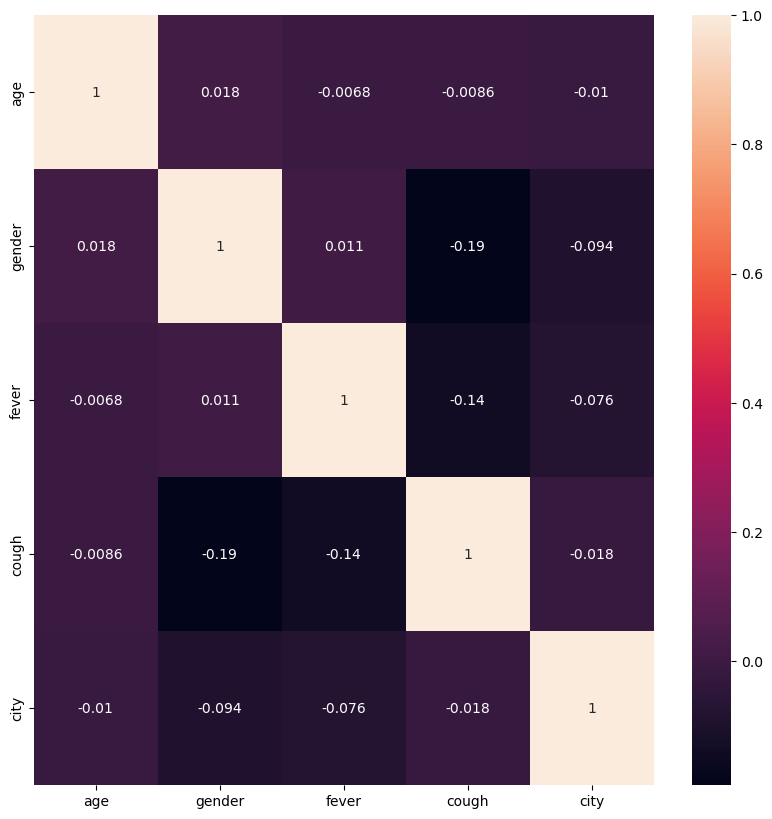

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True)

In [63]:
Y=cd['has_covid']

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [67]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [69]:
y_pred=log_reg.predict(X_test)
log_acc=accuracy_score(Y_test,y_pred)

In [71]:
print("train set aacuracy"+str(accuracy_score(Y_train,log_reg.predict(X_train)*100)))

train set aacuracy0.0


In [73]:
print("test set accuracy"+str(log_acc*100))

test set accuracy70.0


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dct=DecisionTreeClassifier()
dct.fit(X_train,Y_train)

DecisionTreeClassifier()

In [79]:
y_pred=log_reg.predict(X_test)
dct_acc=accuracy_score(Y_test,y_pred)

In [81]:
print("train set aacuracy"+str(accuracy_score(Y_train,dct.predict(X_train)*100)))
print("test set accuracy"+str(dct_acc*100))

train set aacuracy0.0
test set accuracy70.0


In [83]:
models=pd.DataFrame({
    'Model':['log','dct'],
    'score':[log_acc,dct_acc]
})

<Axes: xlabel='Model', ylabel='score'>

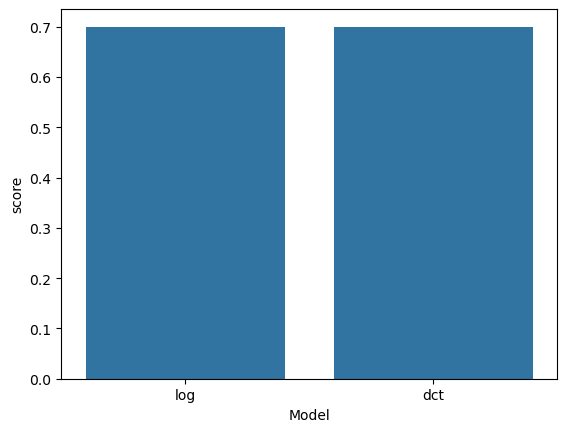

In [85]:
plt.Figure(figsize=(16,8))
sns.barplot(x=models['Model'],y=models['score'])